### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

### importing the data set

In [2]:
zomato = pd.read_csv('Zomato data .csv')

### Data Overview

In [3]:
zomato.shape

(148, 7)

In [4]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
zomato.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

1. The dataset consists of 148 rows and 7 columns. The columns include both categorical (object) and numerical data types:

2. online_order, book_table, and listed_in(type) are categorical variables.

3. This dataset is likely related to restaurant or service listings, with details about online order availability, table booking options, ratings, and 
costs. Further inspection and cleaning may be needed for fields like "rate" to ensure correct data formatting.

## DATA CLEANING AND CHECKING FOR MISSING DATA

1. converting 4.1/5 to just 4.1 in the rate column and
2. changing the data  type of rate from object to int

In [6]:
def rate(value):
    value = str(value).split('/')
    value = value[0]
    return value
zomato['rate'] = zomato['rate'].apply(rate)

In [7]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [8]:
zomato['rate'] = zomato['rate'].astype(float)

In [9]:
zomato.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [10]:
zomato.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [11]:
zomato.duplicated().sum()

0

Sucessfully made the necessary chnages to the rate columns and also  checked for null and duplicate values as there are no duplicate and null values


## DATA VISUALIZATION

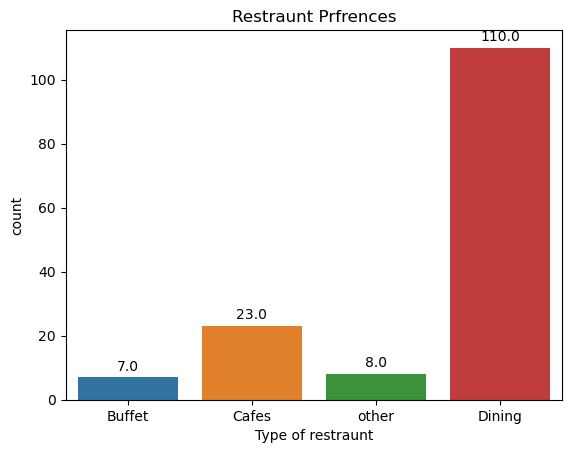

In [12]:
ax = sns.countplot(x= zomato['listed_in(type)'])
plt.xlabel('Type of restraunt')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.title('Restraunt Prfrences')
plt.show()


##### Overall, this graph suggests that Dining restaurants are the most popular choice followed by cafes followed Buffet

Text(0.5, 1.0, 'Restauant Votes')

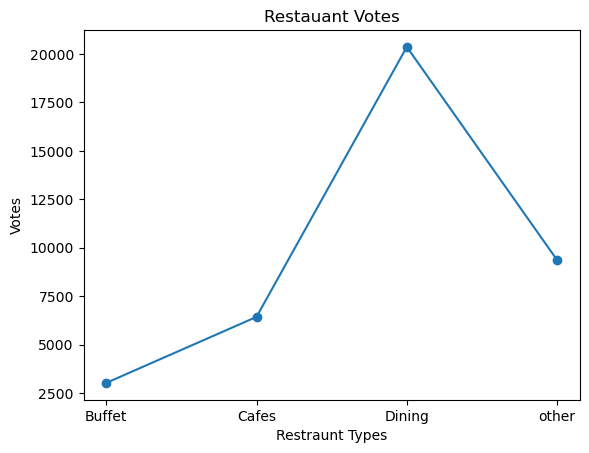

In [13]:
grouped_data = zomato.groupby('listed_in(type)')['votes'].sum()
plt.plot(grouped_data,marker = 'o')
plt.xlabel('Restraunt Types')
plt.ylabel('Votes')
plt.title('Restauant Votes')

##### Again as it can been seen Dining has the maximum number of votes followed by cafes 

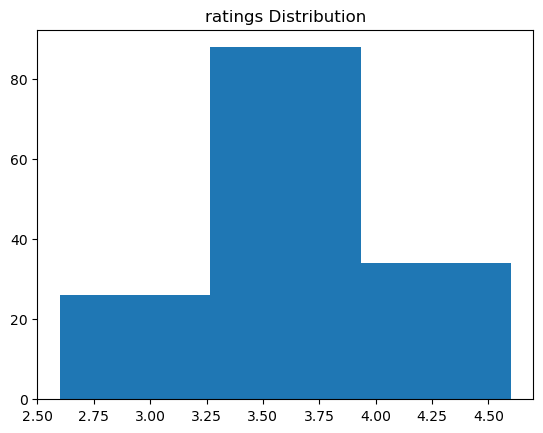

In [14]:
plt.hist(x = zomato['rate'],bins = 3)
plt.title('ratings Distribution')
plt.show()


##### Maximum of the restraunts have recived a good ratting value in between 3.25 - 4

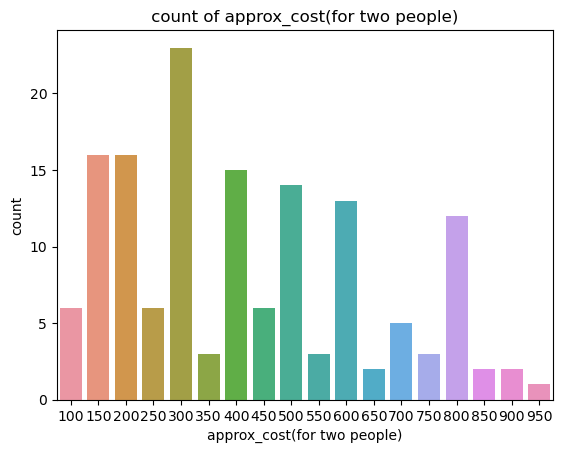

In [15]:
sns.countplot(x= zomato['approx_cost(for two people)'])
plt.title(' count of approx_cost(for two people) ')
plt.show()

##### as can be seen from the above figure 300rs has the most count which means whenever a couple or 2 people go out or order their food they tend to order in the range of 300 Rs

<Axes: xlabel='online_order', ylabel='rate'>

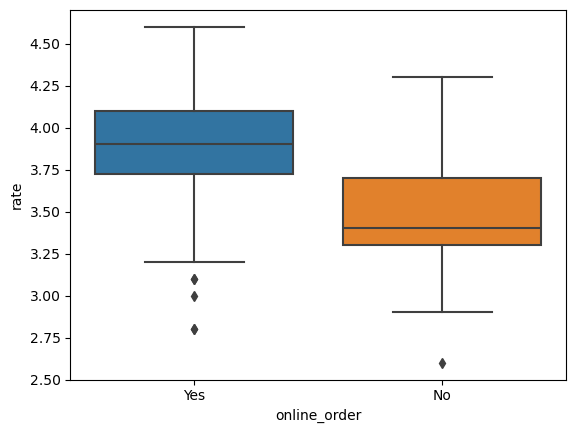

In [16]:
sns.boxplot(x= zomato['online_order'], y =  zomato['rate'])


##### From the above graph it can be observed that online orders recive better ratings comparitively to offline orders. It might be because online apps might
##### directly show the rating optioon in their delivery app whereas in offline mode the person has to manually go and search and then give his/her ratings

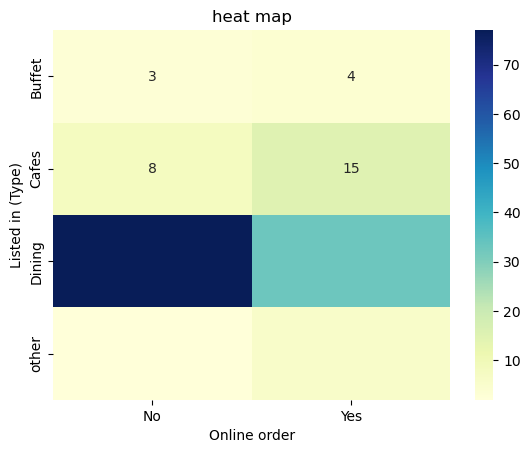

In [22]:
pivot_table = zomato.pivot_table(index = 'listed_in(type)', columns = 'online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt = 'd')
plt.title("heat map")
plt.xlabel("Online order")
plt.ylabel('Listed in (Type)')
plt.show()